# Tổng quan phần tiền xử lý và khám phá dữ liệu

- Xử lí thiếu dữ liệu

- Xử lí nhiễu

- Chuẩn hóa dữ liệu

- Đưa ra những cái nhìn đầu tiên về dữ liệu

## 1. Import libraries

In [1]:
#import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

## 2. Data pre-precessing and exploration

- Đọc dữ liệu từ data/raw_dataset.csv

In [2]:
raw_data = pd.read_csv('../data/raw_dataset.csv')
raw_data.sample(5)

,Liên kết,Tên công ty,Tên công việc,Mức lương,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,...,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Địa điểm làm việc,Mô tả công việc,Yêu cầu công việc,Quyền lợi,Từ khóa,Địa chỉ công ty,Quy mô công ty
527,https://vieclam24h.vn/hanh-chinh-thu-ky/tro-ly...,Công Ty TNHH The Green Market Việt Nam,Trợ Lý Giám Đốc,9 - 15 triệu,TP.HCM,3 tháng,Chuyên viên- nhân viên,NaN,1,Toàn thời gian cố định,...,Đại học,3 năm,Hành chính - Thư ký/Thu mua - Kho Vận - Chuỗi ...,"TP.HCM, 49 Đ. Số 14, Lakeview City, Quận 2, Th...",Triển khai các công việc và dự án do Ban Giám ...,"Làm việc tại Lakeview City, Phường An Phú, Quậ...",Thưởng KPI hàng quýLàm việc trực tiếp với các ...,quận 2giám sát tạp vụthiết kế game di độngViệc...,"49 Đ. Số 14, Lakeview City, Quận 2, Thành phố ...",10 - 150 người
3470,https://vieclam24h.vn/ban-hang-kinh-doanh/trin...,Công Ty Tnhh Dược Phẩm Lemed,Trình Dược Viên Bán Hàng Dược Phẩm (Đi Làm Ngay),7 - 15 triệu,"TP.HCM, Đắk Lắk, Bình Thuận, Bình Dương, Đồng ...",2 tháng,Chuyên viên- nhân viên,NaN,20,Toàn thời gian cố định,...,Trung cấp,Chưa có kinh nghiệm,Bán hàng - Kinh doanh/Dược phẩm/Y tế - Chăm só...,"TP.HCM, Quận 1; Đắk Lắk, Buôn Ma Thuột; Bình T...",- Tuyển TDV toàn quốc- Giới thiệu và bán sản p...,- Độ tuổi: Từ 20 tuổi trở lên.- Trình độ: Tốt ...,"- Thu nhập hấp dẫn, lương cạnh tranh theo năng...",trình dượcdược phẩmquận cái răngViệc làm TP.HC...,"F2 - 22 đường số 5, KDC lô số 20, KĐT Nam Cần ...",10 - 150 người
3571,https://vieclam24h.vn/ban-hang-kinh-doanh/nhan...,Công Ty Cổ Phần Vật Liệu Cách Nhiệt Việt Nhật,Nhân Viên Kinh Doanh Điều Phối Đơn Hàng,9 - 12 triệu,Hà Nội,1 tháng,Chuyên viên- nhân viên,NaN,2,Toàn thời gian cố định,...,Cao đẳng,1 năm,Bán hàng - Kinh doanh/Chăm sóc khách hàng/Vận ...,"Hà Nội, 64 Đại Tự, Kim Chung, Hoài Đức","-Tổng hợp đơn hàng, lên lệch xuất hàng báo cho...",-Độ tuổi: 22-35 tuổi;-Giới tính: Nam/Nữ.-Trình...,-Thời gian thử việc : 1-3 tháng-Mức lương: dao...,tư vấn viên trung tâm tiếng anhgiám sát tạp vụ...,"64 Đại Tự, Kim Chung, Hoài Đức, TP Hà Nội",150 - 300 người
5415,https://vieclam24h.vn/lao-dong-pho-thong/cong-...,Công Ty Tnhh Vinh Cơ,Công Nhân Kho,5.5 - 6.5 triệu,TP.HCM,1 tháng,Chuyên viên- nhân viên,Nam,1,Toàn thời gian cố định,...,NaN,Dưới 1 năm,Lao động phổ thông/Nghề nghiệp khác,"TP.HCM, 97C, Dương Công Khi, ấp 6, Xuân Thới S...",Kiểm tra đơn hàng và chia thùng trước khi đóng...,"Có sức khỏeHòa đồng, thân thiện với mọi người",Được công ty bao suất cơm giữa ca và phụ cấp s...,sơnkhohuyện hóc mônViệc làm TP.HCMLao động phổ...,"97C Dương Công Khi, ấp 6, xã XuânThới Sơn, Hóc...",Trên 300 người
2754,https://vieclam24h.vn/marketing/nhan-vien-tele...,Công Ty Cổ Phần Cnv Holdings,"Nhân Viên Telemarketing, Nghỉ Thứ 7 & Cn, Thu...",8 - 15 triệu,TP.HCM,2 tháng,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,...,Cao đẳng,Dưới 1 năm,Marketing/Chăm sóc khách hàng/Bán hàng - Kinh ...,"TP.HCM, 42/2 Nguyễn Văn Trỗi, phường 15, quận ...","Không gọi quá nhiều, chủ yếu trực page hỗ trợ ...",Có kiến thức về Marketing và Công nghệ là một ...,"Thưởng KPI quý & năm nếu đạt target, thưởng nó...",nhậpcuối tuần tại hà nộithứ 7 và chủ nhật tại ...,"42/2 Nguyễn Văn Trỗi, Phường 15, Quận Phú Nhuậ...",150 - 300 người


## Đầu tiên chúng ta cần một cái nhìn tổng quan về dữ liệu này

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5591 entries, 0 to 5590
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Liên kết             5591 non-null   object
 1   Tên công ty          5591 non-null   object
 2   Tên công việc        5591 non-null   object
 3   Mức lương            5591 non-null   object
 4   Khu vực tuyển        5591 non-null   object
 5   Thời gian thử việc   3577 non-null   object
 6   Cấp bậc              5591 non-null   object
 7   Yêu cầu giới tính    1927 non-null   object
 8   Số lượng tuyển       5591 non-null   int64 
 9   Hình thức làm việc   5591 non-null   object
 10  Độ tuổi              2817 non-null   object
 11  Yêu cầu bằng cấp     4905 non-null   object
 12  Yêu cầu kinh nghiệm  5591 non-null   object
 13  Ngành nghề           5591 non-null   object
 14  Địa điểm làm việc    5581 non-null   object
 15  Mô tả công việc      5591 non-null   object
 16  Yêu cầ

**Giải thích ý nghĩa các cột trong raw data và khám phá kiểu dữ liệu cũng như định dạng của chúng:**  
0. Liên kết : Liến kết đến trang tuyển dụng của trang web
1. Tên công ty: Tên công ty tuyển dụng
- Dựa vào tên công ty ta thấy có 2 loại công ty là công ty cổ phần, công ty trách nhiệm hữu hạn.
2. Tên công việc : Tên công việc đang cần uyển dụng
3. Mức lương: Mức lương tuyển dụng theo định dạng như:  **'7 - 10 triệu'**
4. Khu vực tuyển dụng: Đó là một list các tỉnh thành được ngăn cách nhau bởi dấu **','**
5. Thời gian thử việc
6. Cấp bậc: Cấp bậc của công việc đang tuyển dụng
7. Yêu cầu giới tính: Một số công việc chỉ ưu tiên nữa hoặc ưu tiên nam.
8. Số lượng tuyển: có kiểu **int64**
9.  Hình thức làm việc
10. Yêu cầu độ tuổi : Cung cấp độ tuổi tuyển dụng trong một khoảng nhất định
11. Yêu cầu bằng cấp: Cao Đẳng, Đại Học,..
12. Yêu cầu kinh nghiệm: '1 năm', '2 năm', ...
13. Ngành nghề: Là một list các ngành nghề được ngăn cách nhau bởi dấu **'/'**. Ví dụ: 'Bán hàng - Kinh doanh/Bất động sản/Bảo hiểm'
14. Đia điểm làm việc: Địa chỉ cụ thể của nơi làm việc
15. Mô tả công việc: Mô tả công việc đang tuyển dụng
16. Yêu cầu công viêc: Một đoạn để mô tả yêu cầu công việc, thường do công ty viết và không theo chuẩn.
17. Quyền lợi được hưởng: Quyền lợi được hưởng khi làm việc tại công ty, không theo chuẩn.
18. Từ khóa: Từ khóa của công việc đang tuyển dụng
19. Địa chỉ công ty: Địa chỉ công ty
20. Quy mô công ty: Quy mô công ty
 

= > Để tiếp tục khám phá dữ liệu ta cần phải loại bở những cột không cần thiết, xử lý những cột còn thiếu dữ liệu, những cột có dữ liệu nhiễu, những cột có dữ liệu không chuẩn.

- Vì có một số công việc được đăng tuyển dụng nhiều lần nhưng mỗi lần đăng thì giá trị cột liên kết sẽ khác nhau nên việc kiểm tra trùng lặp dữ liệu sẽ được nhóm thực hiện sau khi đã loại bỏ cột này

- Xem dữ liệu ban đầu có mất mát là bao nhiêu %

In [4]:
percentage_missing_data = pd.DataFrame(raw_data.isnull().sum().sort_values(ascending=False) / len(raw_data) * 100, columns=['% missing'])
percentage_missing_data

,% missing
Yêu cầu giới tính,65.533894
Độ tuổi,49.615453
Thời gian thử việc,36.022179
Yêu cầu bằng cấp,12.269719
Địa điểm làm việc,0.178859
Quyền lợi,0.017886
Yêu cầu công việc,0.017886
Yêu cầu kinh nghiệm,0.000000
Địa chỉ công ty,0.000000
Từ khóa,0.000000


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Xử lý cột Tên Công ty</b></font>


- Ở cột tên công Có 2 loại Công ty TNHH và công ty cổ phần. Nhóm sẽ thêm cột loại Công ty để phân biệt 2 loại công ty này.

In [5]:
cp_signal = [ 'cp', 'cổ phần']
tnhh_signal = ['tnhh','một thành viên', 'tư nhân', 'trách nhiệm hữu hạn' , 'hộ kinh doanh']
name_company = raw_data['Tên công ty'].str.lower()
# name_company
# Phân tích thành 2 loại công ty: TNHH và Cổ phần nếu bất kỳ chuyển nào so khớp với tên công ty
# Nếu khớp với một trong 2 loại thì gán cho cột Loại công ty. 1 Cho công ty tnhh, 2 cho công ty cổ phần và 0 nếu không khớp với bất kỳ giá trị nào 

conditions = [
    name_company.str.contains('|'.join(tnhh_signal), regex=True, na=False),
    name_company.str.contains('|'.join(cp_signal), regex=True, na=False)
]

# Tạo danh sách giá trị tương ứng cho mỗi điều kiện
values = ['Công ty trách nhiệm hữu hạn', 'Công ty cổ phần']

# Áp dụng hàm np.select để gán giá trị cho cột 'Loại công ty'
raw_data['Loại công ty'] = np.select(conditions, values, default=0)
print(raw_data['Loại công ty'].value_counts())
# Xóa những dòng không xác định được loại công ty
raw_data = raw_data[raw_data['Loại công ty'] != '0']
print(raw_data['Loại công ty'].value_counts())

Loại công ty
Công ty trách nhiệm hữu hạn    3235
Công ty cổ phần              2127
0                               229
Name: count, dtype: int64
Loại công ty
Công ty trách nhiệm hữu hạn    3235
Công ty cổ phần              2127
Name: count, dtype: int64


- Một số cột không có nhiều giá trị trong quá trình phân tích của nhóm, hoặc dữ liệu không theo quy chuẩn khó khai thác như: 'Liên kết', 'Tên công ty', 'Tên công việc', 'Mô tả công việc', 'Quyền lợi', 'Yêu cầu công việc', 'Từ khóa', 'Địa điểm làm việc', 'Địa chỉ công ty'. Sẽ được nhóm bỏ qua trong đồ án này.

In [6]:
raw_data.drop(['Liên kết','Tên công ty','Tên công việc', 'Mô tả công việc', 'Quyền lợi', 'Yêu cầu công việc', 'Từ khóa','Địa điểm làm việc', 'Địa chỉ công ty'], axis=1, inplace=True)
raw_data.sample(5)

,Mức lương,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Độ tuổi,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty
3316,8 - 15 triệu,Thừa Thiên Huế,2 tháng,Chuyên viên- nhân viên,NaN,10,Toàn thời gian cố định,18 - 35 tuổi,Trung học,Dưới 1 năm,Tài chính - Đầu tư - Chứng Khoán/Ngân hàng/Bán...,Trên 300 người,Công ty trách nhiệm hữu hạn
2279,8 - 15 triệu,Bình Dương,2 tháng,Chuyên viên- nhân viên,Nam,5,Toàn thời gian cố định,22 - 35 tuổi,Trung cấp,1 năm,Sản xuất - Lắp ráp - Chế biến/Vận hành - Bảo t...,Dưới 10 người,Công ty cổ phần
1406,11 - 20 triệu,Hà Nội,NaN,Quản lý nhóm- giám sát,NaN,1,Toàn thời gian cố định,NaN,Trung cấp,3 năm,Bán hàng - Kinh doanh/Bán sỉ - Bán lẻ - Quản l...,Trên 300 người,Công ty trách nhiệm hữu hạn
218,15 - 20 triệu,Bình Dương,2 tháng,Quản lý cấp trung,NaN,1,Toàn thời gian cố định,25 - 35 tuổi,Đại học,3 năm,Hành chính - Thư ký/Bảo hiểm/Nhân sự,Trên 300 người,Công ty trách nhiệm hữu hạn
3591,10 - 18 triệu,TP.HCM,2 tháng,Chuyên viên- nhân viên,Nam,5,Toàn thời gian cố định,22 - 27 tuổi,Trung cấp,1 năm,Bán hàng - Kinh doanh/Phân tích - Thống kê dữ ...,10 - 150 người,Công ty trách nhiệm hữu hạn


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Xử lý cột Mức lương</b></font>

- Tiếp đến chúng ta cần xử lý cột lương để đưa cột này về một giá trị có kiểu dữ liệu np.float64 thay vì object. Vì các giá trị lương được định nghĩa là một khoảng 'a - b triệu' nhóm quyết định sẽ lấy lương là trung bình của khoảng này. Bên cạnh đó còn có một số công việc để mức lương này có giá trị là 'Thỏa thuận', vì số lượng này không nhiều nên nhóm quyết định sẽ loại bỏ các công việc này. Và nhóm sẽ tạo thêm hai cột mới là 'Mức lương thấp nhất' và 'Mức lương cao nhất' tương ứng với mức lương của từng công việc.

In [7]:
df = raw_data[raw_data['Mức lương'] == 'Thoả thuận ']
print(df.shape)
#Chỉ có 62 trường hợp như thế này 
#=> Xóa các trường hợp này đi
raw_data.drop(df.index, inplace=True)

(62, 13)


In [8]:
def process_salary(salary):
    try:
        a, b = salary.split(' - ')
        a = float(a)
        b = float(b.replace(' triệu', ''))
        return pd.Series([a, b, (a + b) / 2])
    except:
        # Lấy số trong lương
        salary = float(salary.replace(' triệu', ''))
        return pd.Series([salary, salary, salary])
raw_data[['Mức lương thấp nhất', 'Mức lương cao nhất', 'Mức lương trung bình']] = raw_data['Mức lương'].apply(process_salary)
raw_data.drop('Mức lương', axis=1, inplace=True)
raw_data.sample(5)

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Độ tuổi,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình
5485,Hà Nội,2 tháng,Chuyên viên- nhân viên,Nam,2,Toàn thời gian cố định,22 - 30 tuổi,Trung cấp,Dưới 1 năm,Điện - Điện tử - Điện lạnh,10 - 150 người,Công ty trách nhiệm hữu hạn,7.5,20.0,13.75
3969,TP.HCM,3 tháng,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,30 - 45 tuổi,Cao đẳng,3 năm,Kế toán/Kiểm toán/Xuất Nhập Khẩu,10 - 150 người,Công ty trách nhiệm hữu hạn,10.0,13.0,11.50
165,TP.HCM,2 tháng,Chuyên viên- nhân viên,NaN,2,Toàn thời gian cố định,20 - 28 tuổi,Trung học,Dưới 1 năm,Khách sạn - Nhà hàng - Du lịch/Chăm sóc khách ...,Dưới 10 người,Công ty trách nhiệm hữu hạn,7.0,10.0,8.50
1506,Hà Nội,1 tháng,Chuyên viên- nhân viên,NaN,3,Toàn thời gian cố định,NaN,Cao đẳng,1 năm,Bán hàng - Kinh doanh/Bán sỉ - Bán lẻ - Quản l...,10 - 150 người,Công ty trách nhiệm hữu hạn,9.0,25.0,17.00
4535,Tây Ninh,2 tháng,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,25 - 30 tuổi,Cao đẳng,1 năm,Tài chính - Đầu tư - Chứng Khoán/Kế toán,Trên 300 người,Công ty cổ phần,7.0,10.0,8.50


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5300 entries, 0 to 5590
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Khu vực tuyển         5300 non-null   object 
 1   Thời gian thử việc    3380 non-null   object 
 2   Cấp bậc               5300 non-null   object 
 3   Yêu cầu giới tính     1850 non-null   object 
 4   Số lượng tuyển        5300 non-null   int64  
 5   Hình thức làm việc    5300 non-null   object 
 6   Độ tuổi               2678 non-null   object 
 7   Yêu cầu bằng cấp      4643 non-null   object 
 8   Yêu cầu kinh nghiệm   5300 non-null   object 
 9   Ngành nghề            5300 non-null   object 
 10  Quy mô công ty        5300 non-null   object 
 11  Loại công ty          5300 non-null   object 
 12  Mức lương thấp nhất   5300 non-null   float64
 13  Mức lương cao nhất    5300 non-null   float64
 14  Mức lương trung bình  5300 non-null   float64
dtypes: float64(3), int64(1), o

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Xử lý cột Thời gian thử việc </b></font>

In [10]:
print(raw_data['Thời gian thử việc'].info())
print(raw_data['Thời gian thử việc'].value_counts())

<class 'pandas.core.series.Series'>
Index: 5300 entries, 0 to 5590
Series name: Thời gian thử việc
Non-Null Count  Dtype 
--------------  ----- 
3380 non-null   object
dtypes: object(1)
memory usage: 82.8+ KB
None
Thời gian thử việc
2 tháng                         2504
1 tháng                          616
02 tháng                         102
3 tháng                           62
01 tháng                          37
1.5 tháng                         12
2  tháng                           9
0.5 tháng                          8
1  tháng                           6
1-2 tháng                          4
1 tháng tháng                      4
2 tháng tháng                      4
6 tháng                            3
03 tháng                           2
1.2 tháng                          1
2 tháng  tháng                     1
0.1 tháng                          1
Trao đổi khi phỏng vấn tháng       1
2 thang tháng                      1
1 Tháng tháng                      1
2 THÁNG tháng              

In [11]:
# Có 1 trường họp Trao đổi khi phỏng vấn tháng và một trường hợp là '1-2 tháng' Chúng em xem trường hợp Trao đổi khi phỏng vấn tháng như là một giá trị missing và 
# chuyển trường hợp '1-2 tháng' thành 1.5 tháng
raw_data['Thời gian thử việc'].replace('Trao đổi khi phỏng vấn tháng', np.nan, inplace=True)
raw_data['Thời gian thử việc'].replace('1-2 tháng', '1.5 tháng', inplace=True)
print(raw_data['Thời gian thử việc'].value_counts())

Thời gian thử việc
2 tháng           2504
1 tháng            616
02 tháng           102
3 tháng             62
01 tháng            37
1.5 tháng           16
2  tháng             9
0.5 tháng            8
1  tháng             6
1 tháng tháng        4
2 tháng tháng        4
6 tháng              3
03 tháng             2
1.2 tháng            1
2 tháng  tháng       1
0.1 tháng            1
2 thang tháng        1
1 Tháng tháng        1
2 THÁNG tháng        1
Name: count, dtype: int64


In [12]:
# Lấy phần số trong chuỗi
def get_number(string):
    try:
        return float(string.split(' ')[0])
    except:
        return np.nan
raw_data['Thời gian thử việc'] = raw_data['Thời gian thử việc'].apply(get_number)
print(raw_data['Thời gian thử việc'].info())
print(raw_data['Thời gian thử việc'].value_counts())

<class 'pandas.core.series.Series'>
Index: 5300 entries, 0 to 5590
Series name: Thời gian thử việc
Non-Null Count  Dtype  
--------------  -----  
3379 non-null   float64
dtypes: float64(1)
memory usage: 82.8 KB
None
Thời gian thử việc
2.0    2622
1.0     664
3.0      64
1.5      16
0.5       8
6.0       3
1.2       1
0.1       1
Name: count, dtype: int64


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b> Xử lý cột Yêu cầu giới tính</b></font>

In [13]:
raw_data['Yêu cầu giới tính'].info()

<class 'pandas.core.series.Series'>
Index: 5300 entries, 0 to 5590
Series name: Yêu cầu giới tính
Non-Null Count  Dtype 
--------------  ----- 
1850 non-null   object
dtypes: object(1)
memory usage: 82.8+ KB


In [14]:
raw_data['Yêu cầu giới tính'].value_counts()    

Yêu cầu giới tính
Nam    1139
Nữ      711
Name: count, dtype: int64

In [15]:
# Thay thế nhưng cột không có thông  thành Không yêu cầu
raw_data['Yêu cầu giới tính'].fillna('Không yêu cầu', inplace=True)
raw_data['Yêu cầu giới tính'].value_counts()

Yêu cầu giới tính
Không yêu cầu    3450
Nam              1139
Nữ                711
Name: count, dtype: int64

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Xử lý cột dữ liệu Yêu cầu bằng cấp</b></font>

In [16]:
print(raw_data['Yêu cầu bằng cấp'].info())
print(raw_data['Yêu cầu bằng cấp'].value_counts())

<class 'pandas.core.series.Series'>
Index: 5300 entries, 0 to 5590
Series name: Yêu cầu bằng cấp
Non-Null Count  Dtype 
--------------  ----- 
4643 non-null   object
dtypes: object(1)
memory usage: 82.8+ KB
None
Yêu cầu bằng cấp
Cao đẳng        1862
Đại học         1079
Trung cấp        999
Trung học        631
Chứng chỉ         67
Trên đại học       5
Name: count, dtype: int64


- Đây là một tiêu chí khá quan trọng khi tuyển hoặc tìm việc làm vì vậy khi trường này trống thì có thể hiểu được trong trường hợp này sẽ do phần lớn công việc không có yêu cầu về bằng cấp. Vậy ta sẽ điền 'Không' vào các vị trí bị thiếu dữ liệu.

In [17]:
raw_data['Yêu cầu bằng cấp'].replace(np.nan, 'Không', inplace=True)
print(raw_data['Yêu cầu bằng cấp'].info())
print(raw_data['Yêu cầu bằng cấp'].value_counts())

<class 'pandas.core.series.Series'>
Index: 5300 entries, 0 to 5590
Series name: Yêu cầu bằng cấp
Non-Null Count  Dtype 
--------------  ----- 
5300 non-null   object
dtypes: object(1)
memory usage: 82.8+ KB
None
Yêu cầu bằng cấp
Cao đẳng        1862
Đại học         1079
Trung cấp        999
Không            657
Trung học        631
Chứng chỉ         67
Trên đại học       5
Name: count, dtype: int64


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Xử lý cột dữ liệu Độ tuổi</b></font>

In [18]:
print(raw_data['Độ tuổi'].info())
print(raw_data['Độ tuổi'].value_counts())

<class 'pandas.core.series.Series'>
Index: 5300 entries, 0 to 5590
Series name: Độ tuổi
Non-Null Count  Dtype 
--------------  ----- 
2678 non-null   object
dtypes: object(1)
memory usage: 82.8+ KB
None
Độ tuổi
22 - 35 tuổi    165
25 - 35 tuổi    164
18 - 30 tuổi    129
25 - 40 tuổi    118
18 - 35 tuổi    114
               ... 
19 - 38 tuổi      1
24 - 48 tuổi      1
22 - 39 tuổi      1
18 - 53 tuổi      1
40 - 50 tuổi      1
Name: count, Length: 230, dtype: int64


- Ở cột đổ tuổi thì có format như ở mức lương nên nhóm em quyết định chia ra thành: Tuổi thấp nhất và Tuổi cao nhất và Tuổi trung bình. Những giá trị còn thiếu thì là np.nan

In [19]:
# format '18 - 35 tuổi' thành 2 cột là tuổi cao nhất và tuổi thấp nhất, Tuổi trung bình
def process_age(age):
    try:
        a, b = age.split(' - ')
        a = int(a)
        b = int(b.replace(' tuổi', ''))
        return pd.Series([a, b, (a + b) / 2])
    except:
        return pd.Series([np.nan, np.nan, np.nan])
raw_data[['Tuổi thấp nhất', 'Tuổi cao nhất', 'Tuổi trung bình']] = raw_data['Độ tuổi'].apply(process_age)
raw_data.drop('Độ tuổi', axis=1, inplace=True)
raw_data.sample(5)

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
164,TP.HCM,1.0,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,Cao đẳng,1 năm,Hành chính - Thư ký/Chăm sóc khách hàng/Bán hà...,Dưới 10 người,Công ty trách nhiệm hữu hạn,10.0,15.0,12.5,NaN,NaN,NaN
2696,"TP.HCM, Cần Thơ",2.0,Chuyên viên- nhân viên,Nữ,10,Toàn thời gian cố định,Trung cấp,Chưa có kinh nghiệm,Bán hàng - Kinh doanh/Khoa học - Kỹ thuật/Mark...,150 - 300 người,Công ty cổ phần,7.0,16.0,11.5,22.0,29.0,25.5
1719,TP.HCM,2.0,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Cao đẳng,1 năm,Bán sỉ - Bán lẻ - Quản lý cửa hàng,10 - 150 người,Công ty trách nhiệm hữu hạn,10.0,15.0,12.5,NaN,NaN,NaN
131,TP.HCM,NaN,Chuyên viên- nhân viên,Không yêu cầu,5,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,Biên phiên dịch/Thông tin - Truyền thông - Quả...,150 - 300 người,Công ty trách nhiệm hữu hạn,10.0,20.0,15.0,NaN,NaN,NaN
2048,Hà Nội,0.5,Chuyên viên- nhân viên,Nam,2,Toàn thời gian cố định,Không,Dưới 1 năm,IT Phần cứng - Mạng/IT Phần mềm,Dưới 10 người,Công ty trách nhiệm hữu hạn,7.0,10.0,8.5,NaN,NaN,NaN


## Nhóm đã duyệt qua tất cả dữ liệu và xử lý các cột dữ liệu thiếu, nhiễu, không chuẩn. Tiếp theo chúng ta sẽ kiểm tra dữ liệu

In [20]:
# Dữ liệu có bao nhiêu dòng, bao nhiêu cột
raw_data.shape

(5300, 17)

- Kiểm tra trùng lặp dữ liệu

In [21]:
is_duplicate = raw_data.duplicated().any()
if is_duplicate:
    print("Có sự trùng lặp dữ liệu")
else:
    print("Không có sự trùng lặp dữ liệu")

Có sự trùng lặp dữ liệu


- Có sự trùng lặp trong bộ dữ liệu nên chúng ta sẽ phải xử lí

In [22]:
#remove duplicate
raw_data.drop_duplicates(inplace=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5090 entries, 0 to 5590
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Khu vực tuyển         5090 non-null   object 
 1   Thời gian thử việc    3225 non-null   float64
 2   Cấp bậc               5090 non-null   object 
 3   Yêu cầu giới tính     5090 non-null   object 
 4   Số lượng tuyển        5090 non-null   int64  
 5   Hình thức làm việc    5090 non-null   object 
 6   Yêu cầu bằng cấp      5090 non-null   object 
 7   Yêu cầu kinh nghiệm   5090 non-null   object 
 8   Ngành nghề            5090 non-null   object 
 9   Quy mô công ty        5090 non-null   object 
 10  Loại công ty          5090 non-null   object 
 11  Mức lương thấp nhất   5090 non-null   float64
 12  Mức lương cao nhất    5090 non-null   float64
 13  Mức lương trung bình  5090 non-null   float64
 14  Tuổi thấp nhất        2586 non-null   float64
 15  Tuổi cao nhất         2586

=> Các dữ liệu dữ liệu đã được chuẩn hóa và đưa về đúng định dạng kiểu dữ liệu của chúng

# Kiểm tra lại dữ liệu sau khi đã xử lí xử lý missing và nhiễu

## Xủ lý missing values
- Xác định Phần trăm dữ liệu bị thiếu 

In [23]:
# Phần trăm dữ liệu bị thiếu và sắp xếp giảm dần
percentage_missing_data = pd.DataFrame(raw_data.isnull().sum().sort_values(ascending=False) / len(raw_data) * 100, columns=['% missing'])
percentage_missing_data

,% missing
Tuổi trung bình,49.194499
Tuổi cao nhất,49.194499
Tuổi thấp nhất,49.194499
Thời gian thử việc,36.640472
Quy mô công ty,0.000000
Mức lương trung bình,0.000000
Mức lương cao nhất,0.000000
Mức lương thấp nhất,0.000000
Loại công ty,0.000000
Khu vực tuyển,0.000000


- Dự liệu tuổi và thời gian thử việc có rất nhiều missing do đó nhóm em quyết định dùng thuật toán KNN để điền khuyết dữ liệu

In [24]:

# Đảm bảo không có nhãn nào bị missing
mutil_label_features = ['Khu vực tuyển', 'Ngành nghề']
single_label_features = [ 'Cấp bậc', 'Số lượng tuyển','Hình thức làm việc','Yêu cầu bằng cấp', 
                'Yêu cầu kinh nghiệm', 'Quy mô công ty', 'Loại công ty']
targets = ['Thời gian thử việc', 'Tuổi thấp nhất', 'Tuổi cao nhất']

# Chuẩn bị dữ liệu
df_knn = raw_data[single_label_features].copy()
# Hàm tách dữ liệu
def split_labels(column, separator):
    return [[label.strip() for label in labels.split(separator)] for labels in column]

# Tách 'Khu vực tuyển'
khu_vuc_labels = split_labels(raw_data['Khu vực tuyển'], ', ')

# Tách 'Ngành nghề'
nganh_nghe_labels = split_labels(raw_data['Ngành nghề'], '/')

# Khởi tạo và áp dụng MultiLabelBinarizer
mlb_khu_vuc = MultiLabelBinarizer()
mlb_nganh_nghe = MultiLabelBinarizer()

khu_vuc_binarized = mlb_khu_vuc.fit_transform(khu_vuc_labels)
nganh_nghe_binarized = mlb_nganh_nghe.fit_transform(nganh_nghe_labels)

# Tạo DataFrame mới từ kết quả nhị phân
khu_vuc_df = pd.DataFrame(khu_vuc_binarized, columns=mlb_khu_vuc.classes_)
nganh_nghe_df = pd.DataFrame(nganh_nghe_binarized, columns=mlb_nganh_nghe.classes_)

# Đặt lại chỉ mục cho các DataFrame
df_knn.reset_index(drop=True, inplace=True)
khu_vuc_df.reset_index(drop=True, inplace=True)
nganh_nghe_df.reset_index(drop=True, inplace=True)

df_knn = pd.concat([df_knn, khu_vuc_df, nganh_nghe_df], axis=1)

# Mã hóa nhãn cho các cột chọn lựa
for col in single_label_features:
    le = LabelEncoder()
    df_knn[col] = le.fit_transform(df_knn[col])
    
print(df_knn.shape)
# Kiểm tra xem có giá trị Nan nào không và nằn ở những cột nào
assert df_knn.isnull().any().any() == False


(5090, 124)


In [25]:
print("Trước khi điền, Số lương missing values là:\n", raw_data[targets].isnull().sum())

Trước khi điền, Số lương missing values là:
 Thời gian thử việc    1865
Tuổi thấp nhất        2504
Tuổi cao nhất         2504
dtype: int64


In [26]:

# Tạo DataFrame chứa cả đặc trưng và mục tiêu
df_full = pd.concat([df_knn, raw_data[targets]], axis=1)

# Áp dụng KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_full)
df_imputed = pd.DataFrame(df_imputed, columns=df_full.columns)
# Điền vào dữ liệu gốc
for target in targets:
    if target == 'Thời gian thử việc':
        # Làm tròn giống như những giá trị khác thu thập được 
        raw_data[target] = df_imputed[target].round(1)
    else:
        # Làm tròn thành số nguyên
        raw_data[target] = df_imputed[target].round(0).astype(int)

# Kiểm tra DataFrame sau khi điền dữ liệu còn giá trị missing không
print("Sau khi điền, số lượng missing values là:\n", raw_data[targets].isnull().sum())

Sau khi điền, số lượng missing values là:
 Thời gian thử việc    26
Tuổi thấp nhất        26
Tuổi cao nhất         26
dtype: int64


- Nguyên nhân vẫn còn missing values sau khi thực hiện KNN rồi là do dữ liệu bị nhiễu, xung quanh nó không có những giá trị nào tương đồng hoặc gần nó. Vì vậy nhóm em quyết định sẽ xóa những dòng dữ liệu này đi.

In [27]:
# Tính tuổi trung bình cho cột còn lại
raw_data['Tuổi trung bình'] = (raw_data['Tuổi thấp nhất'] + raw_data['Tuổi cao nhất']) / 2
# Như vậy vẫn còn 26 dòng không thể điền dữ liệu, vì thế ta sẽ xóa những dòng này đi
raw_data.dropna(inplace=True)
raw_data

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
0,Hà Nội,2.0,Chuyên viên- nhân viên,Không yêu cầu,20,Toàn thời gian cố định,Trung cấp,Chưa có kinh nghiệm,Hành chính - Thư ký/Chăm sóc khách hàng/Ngân hàng,Trên 300 người,Công ty cổ phần,7.0,10.0,8.50,23.0,38.0,30.5
1,TP.HCM,1.0,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,Đại học,2 năm,Xuất Nhập Khẩu/Hành chính - Thư ký/Thu mua - K...,10 - 150 người,Công ty trách nhiệm hữu hạn,10.0,15.0,12.50,22.0,40.0,31.0
2,Hà Nội,1.0,Chuyên viên- nhân viên,Không yêu cầu,6,Toàn thời gian cố định,Không,Dưới 1 năm,Bán hàng - Kinh doanh/Hành chính - Thư ký/Điện...,10 - 150 người,Công ty cổ phần,10.0,30.0,20.00,22.0,38.0,30.0
3,Tây Ninh,2.0,Chuyên viên- nhân viên,Nữ,2,Toàn thời gian cố định,Đại học,Chưa có kinh nghiệm,Kế toán/Hành chính - Thư ký/Sản xuất - Lắp ráp...,10 - 150 người,Công ty trách nhiệm hữu hạn,10.0,15.0,12.50,22.0,30.0,26.0
4,Bà Rịa - Vũng Tàu,2.0,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Đại học,2 năm,Tài chính - Đầu tư - Chứng Khoán/Kế toán/Hành ...,Trên 300 người,Công ty cổ phần,10.0,20.0,15.00,22.0,35.0,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5557,Bình Dương,1.8,Quản lý cấp cao,Nam,1,Toàn thời gian cố định,Đại học,Hơn 5 năm,Cơ khí - Ô tô - Tự động hóa,10 - 150 người,Công ty trách nhiệm hữu hạn,35.0,40.0,37.50,22.0,36.0,29.0
5558,Bình Dương,1.0,Chuyên viên- nhân viên,Nam,2,Toàn thời gian cố định,Trung học,1 năm,Cơ khí - Ô tô - Tự động hóa,150 - 300 người,Công ty cổ phần,8.0,10.0,9.00,20.0,25.0,22.5
5559,Gia Lai,1.8,Chuyên viên- nhân viên,Không yêu cầu,10,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,Bán hàng - Kinh doanh/Cơ khí - Ô tô - Tự động hóa,10 - 150 người,Công ty trách nhiệm hữu hạn,4.5,20.0,12.25,18.0,25.0,21.5
5560,TP.HCM,1.8,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Cao đẳng,1 năm,Bán hàng - Kinh doanh/Cơ khí - Ô tô - Tự động hóa,10 - 150 người,Công ty trách nhiệm hữu hạn,15.0,25.0,20.00,22.0,36.0,29.0


In [28]:
raw_data[targets].describe()

,Thời gian thử việc,Tuổi thấp nhất,Tuổi cao nhất
count,5064.000000,5064.000000,5064.000000
mean,1.809755,22.614929,36.253555
std,0.383956,2.725550,5.287217
min,0.100000,15.000000,19.000000
25%,1.800000,21.000000,34.000000
50%,2.000000,22.000000,35.000000
75%,2.000000,24.000000,40.000000
max,6.000000,44.000000,60.000000


## Xử lý nhiễu
- Mục tiêu của đồ án này là dự đoán mức lương nên nhóm em quyết định xem Mức lương trung bình có nhiễu hay không.
- Những giá trị này nếu không được xử lý khi đưa vào mô hiện sẽ làm cho mô hình bị sai lệch nên nhóm em quyết định xóa những giá trị này.

<Axes: xlabel='Mức lương trung bình'>

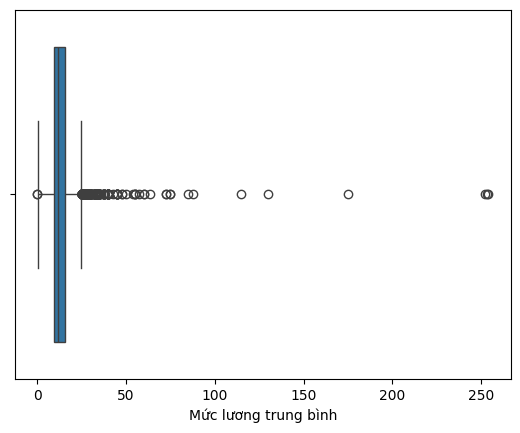

In [29]:
# Vẽ biểu đồ boxplot cho cột lương trung bình
sns.boxplot(x=raw_data['Mức lương trung bình'])


- Nhìn vào biểu đồ có thể nhận thấy mức lương trung bình có khá nhiều giá trị ngoại lai. Nguyên nhân là do khoảng lương của nhà tuyển dụng đưa ra quá rộng. Vì vậy nhóm em quyết định sẽ dùng iqr để xóa các dữ liệu này.

<Axes: xlabel='Mức lương trung bình'>

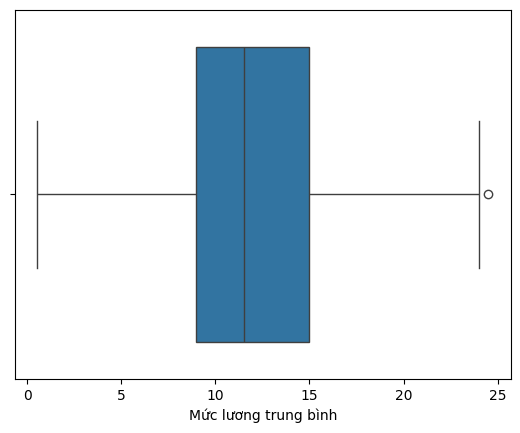

In [30]:
# Dùng iqr để xác định giá trị outlier
Q1 = raw_data['Mức lương trung bình'].quantile(0.25)
Q3 = raw_data['Mức lương trung bình'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Loại những trường hợp ngoại lệ để xử lý nhiễu
raw_data = raw_data[(raw_data['Mức lương trung bình']>= lower_bound)&(raw_data['Mức lương trung bình'] <= upper_bound)]
# Vẽ biểu đồ để đánh giá lại
sns.boxplot(x=raw_data['Mức lương trung bình'])


In [31]:
# Tên các cột dữ liệu
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4739 entries, 0 to 5561
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Khu vực tuyển         4739 non-null   object 
 1   Thời gian thử việc    4739 non-null   float64
 2   Cấp bậc               4739 non-null   object 
 3   Yêu cầu giới tính     4739 non-null   object 
 4   Số lượng tuyển        4739 non-null   int64  
 5   Hình thức làm việc    4739 non-null   object 
 6   Yêu cầu bằng cấp      4739 non-null   object 
 7   Yêu cầu kinh nghiệm   4739 non-null   object 
 8   Ngành nghề            4739 non-null   object 
 9   Quy mô công ty        4739 non-null   object 
 10  Loại công ty          4739 non-null   object 
 11  Mức lương thấp nhất   4739 non-null   float64
 12  Mức lương cao nhất    4739 non-null   float64
 13  Mức lương trung bình  4739 non-null   float64
 14  Tuổi thấp nhất        4739 non-null   float64
 15  Tuổi cao nhất         4739

# Kết luận
- Vậy trong phần tiền xử lý dữ liệu chúng em đã trải qua các bước như sau:
    - Xử lý dữ liệu thiếu
    - Xử lý dữ liệu nhiễu
    - Chuẩn hóa dữ liệu
    - Đưa ra những cái nhìn đầu tiên về dữ liệu ( Số lượng dòng, số lượng cột, kiểu dữ liệu, định dạng dữ liệu, ...)

In [32]:
# Lưu các giá tri vào file cleaned_dataset.csv
raw_data.to_csv('../data/cleaned_dataset.csv', index=False)